# Am I a header?

## Questions to answer:
Tasks

Describe the data.

How big?

What are the columns and what do they mean?

### What’s the average age of...

    any Titanic passenger
    a survivor
    a non-surviving first-class passenger
    Male survivors older than 30 from anywhere but Queenstown

    For the groups you chose, how far (in years) are the average ages from the median ages?

### What’s the most common...

    passenger class
    port of Embarkation
    number of siblings or spouses aboard for survivors

Within what range of standard deviations from the mean (0-1, 1-2, 2-3) is the median ticket price? Is it above or below the mean?

How much more expensive was the 90th percentile ticket than the 5th percentile ticket? Are they the same class?

The highest average ticket price was paid by passengers from which port? Null ports don’t count

Which port has passengers from the most similar passenger class?

What fraction of surviving 1st-class males paid lower than the overall median ticket price?

How much older/younger was the average surviving passenger with family members than the average non-surviving passenger without them?

Display the relationship (i.e. make a plot) between survival rate and the quantile of the ticket price for 20 integer quantiles.

To be clearer, what I want is for you to specify 20 quantiles, and for each of those quantiles divide the number of survivors in that quantile by the total number of people in that quantile. That’ll give you the survival rate in that quantile.

Then plot a line of the survival rate against the ticket fare quantiles.
Make sure you label your axes.

*STRETCH GOAL* For each of the following characteristics, find the median in the data.

age
ticket price
siblings/spouses
parents/children

If you were to use these medians to draw numerical boundaries separating survivors from non-survivors, which of these characteristics would be the best choice and why?


In [76]:
#getting data
import pandas
import numpy as np
from sklearn import neighbors
from sklearn.neighbors import DistanceMetric 
from pprint import pprint

MY_TITANIC_TRAIN ='./sample_data/train.csv'
MY_TITANIC_TEST = './sample_data/test.csv'
titanic_dataframe = pandas.read_csv(MY_TITANIC_TRAIN)
df = titanic_dataframe
print('length: {0} '.format(len(titanic_dataframe)))
titanic_dataframe.head(2)

length: 891 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


#### The data is 891 lines long

In [3]:
titanic_dataframe.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### The average age of a titanic passenger is 29.699118 years

In [5]:
survivors = titanic_dataframe[titanic_dataframe.Survived == 1]

In [7]:
survivors.Age.mean()

28.343689655172415

#### The average age of a survivor is 28.343689655172415 years.

In [11]:
first_dead = df[(df.Survived == 0) & (df.Pclass == 1)]
first_dead.Age.mean()

43.6953125

#### The average age of a dead person in first class is 43.6953125 years

In [16]:
surviving_thirtyplus_guys_from_not_queensland = df[(df.Embarked != 'Q') & 
                                                   (df.Sex == 'male') & 
                                                   (df.Age > 30) & 
                                                   (df.Survived == 1)]
surviving_thirtyplus_guys_from_not_queensland.Age.mean()

41.48780487804878

#### The average age of a non-queenslander male and over 30 is 41.48780487804878

In [20]:
diff_survivors = abs(survivors.Age.median() - survivors.Age.mean())
diff_first_dead = abs(first_dead.Age.median() - first_dead.Age.mean())
diff_not_queensland = abs(surviving_thirtyplus_guys_from_not_queensland.Age.median() - 
                          surviving_thirtyplus_guys_from_not_queensland.Age.mean())
print(diff_survivors, diff_first_dead, diff_not_queensland)

0.34368965517241534 1.5546875 3.4878048780487774


#### The distance from our groups' mean values to their median values is see above.

In [27]:
print(df['Pclass'].mode())
print(df['Embarked'].mode())
print(survivors.SibSp.mode())

0    3
dtype: int64
0    S
dtype: object
0    0
dtype: int64


In [29]:
farestd = df['Fare'].std()
print(farestd)

49.693428597180905


In [33]:
tick_diff = df['Fare'].mean() - df['Fare'].median()
print(tick_diff)
print(tick_diff / farestd)

17.7500079685746
0.3571902456652297


#### The median ticket price is .357 standard deviantions below the mean

In [44]:
ninedth, fifth = df['Fare'].quantile(q = [.9, .05])
quantdiff = ninedth - fifth
print(quantdiff)
print(df[df.Fare == fifth].Pclass.mode() != df[df.Fare == ninedth].Pclass.mode())


70.7333
0    True
dtype: bool


#### The 90th percentile Fare is 70.7333 bucks larger than the 5th percentile.  They weren't of the same class.

In [48]:
qavg = df[df.Embarked == 'Q'].Fare.mean()
savg = df[df.Embarked == 'S'].Fare.mean()
cavg = df[df.Embarked == 'C'].Fare.mean()
lst = [('Q', qavg), ('S', savg), ('C', cavg)]
print(max(lst, key=lambda x:x[1]))

('C', 59.95414404761905)


#### The highest mean ticket price was paid in 'C'.  It was 59.95414404761905.

In [51]:
cclassstd = df[df['Embarked'] == 'C'].Pclass.std()
print('c std:', cclassstd)
sclassstd = df[df['Embarked'] == 'S'].Pclass.std()
print('s std:', sclassstd)
qclassstd = df[df['Embarked'] == 'Q'].Pclass.std()
print('q std:', qclassstd)

c std: 0.944099832575668
s std: 0.7894024365513868
q std: 0.36927447293799803


#### Port 'Q' has the most similar classed passengers because the standard deviation of its class distribution is smallest.

In [68]:
#What fraction of surviving 1st-class males paid lower than the overall median ticket price?
fancy_alive_men = survivors[(df.Sex == 'male') & (df.Pclass == 1)]
median_fare = df.Fare.median()
paid_less = fancy_alive_men[fancy_alive_men.Fare < median_fare]
fancy_count = fancy_alive_men.Survived.count()
paid_less_count = paid_less.Survived.count()
answer_fraction = paid_less_count / fancy_count
print(median_fare)
print(fancy_alive_men.Fare.min())
print(paid_less_count)

14.4542
26.2875
0


/Users/patrick/anaconda3/envs/data-science/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


#### None of the surviving men from class 1 paid less than the median ticket price.  The minimum ticket price for a surviving 1st class male passenger is 26.2875.  The median ticket price is 14.4542.  Also, when we take a subset of the fancy_men dataframe for blokes paying less than the median price, we get zero values.

In [72]:
avg_solo = df[(df.SibSp == 0) & (df.Parch == 0) & (df.Survived == 1)]
avg_solo = avg_solo.Age.mean()

avg_fam = df[((df.SibSp != 0) | (df.Parch != 0)) & (df.Survived == 1)]
avg_fam = avg_fam.Age.mean()

print(avg_solo - avg_fam)

6.285475961538459


#### The average age of a surviving single person is 6.285 years older than a surviving family member.

[]


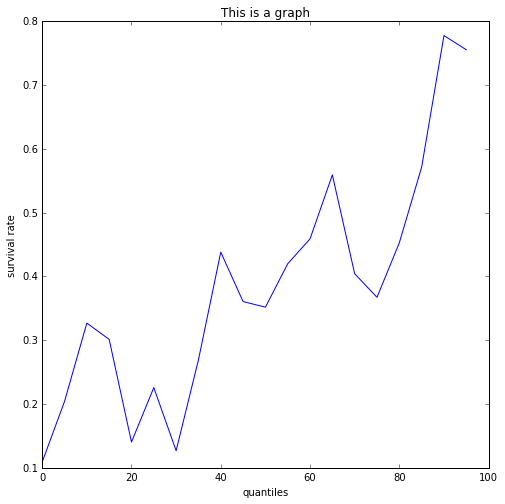

In [132]:
import matplotlib.pyplot as plt
%matplotlib inline
alist = []
survivor_rate = []
# df[(df.Fare <= df.Fare.quantile(q=0.05)) & (df.Fare >= df.Fare.quantile(q=0))]

for i in range(0, 20, 1):
    cut = (df.Fare >= df.Fare.quantile(q=0.05*i)) & (df.Fare <= df.Fare.quantile(q=0.05*(i+1)))
    folks_in_q = sum(cut)
    survivors_in_q = sum(cut & (df.Survived == 1))
    survivor_rate.append(survivors_in_q / folks_in_q)
print(alist)


plt.figure(figsize=(8, 8))
plt.title('This is a graph')
plt.plot(range(0, 100, 5), survivor_rate)
plt.xlabel("quantiles"); plt.ylabel("survival rate")
plt.show()


# for i in alist:
#     i = (i[i.Survived == 1].count() / i.count())
#     print(i)
# print(alist)

#np_data = np.
# print(dir(np))
# H, edges = np.histogram(df, bins=20)
# print(H)
# print(edges)
# some_data = np.random.normal(size=1000000)
# H, edges = np.histogram(some_data, bins=100)

# plt.figure(figsize=(10, 4))
# plt.title('The "Normal" Distribution')
# plt.plot(edges[:-1], H)
# plt.xlim(-4, 4)
# plt.xlabel("Some Measurement"); plt.ylabel("Frequency of Measurement")
# plt.show()

# df.plot(x = "Age", y = "Fare")


In [119]:
a = np.array([True, False, True, False, True, False, True])
b = np.array([True, False, False, False, False, False, False])

a & b

array([ True, False, False, False, False, False, False], dtype=bool)